In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sys
from sklearn import model_selection
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from termcolor import colored as cl
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.metrics import f1_score

In [24]:
data=pd.read_csv("C:\\Users\\ADMIN\\Documents\\creditcard.csv")
data.drop_duplicates(inplace=True)
data=data.sample(frac=0.1,random_state=1)

In [25]:
Fraud=data[data['Class']==1]
Valid=data[data["Class"]==0]
percentage_of_fraud=round(len(Fraud)/len(Valid)*100,2)
outlier_fraction=len(Fraud)/float(len(Valid))

In [26]:
print(outlier_fraction)
print(max(data.Amount),min(data.Amount))

0.001411781315074295
25691.16 0.0


In [27]:
print('Fraud Cases: {}'.format(len(Fraud)))
print('Valid Cases: {}'.format(len(Valid)))
print(cl('Percentage of fraud cases: {}'.format(percentage_of_fraud),attrs=['bold']))
data.info()

Fraud Cases: 40
Valid Cases: 28333
Percentage of fraud cases: 0.14
<class 'pandas.core.frame.DataFrame'>
Int64Index: 28373 entries, 33560 to 224909
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    28373 non-null  float64
 1   V1      28373 non-null  float64
 2   V2      28373 non-null  float64
 3   V3      28373 non-null  float64
 4   V4      28373 non-null  float64
 5   V5      28373 non-null  float64
 6   V6      28373 non-null  float64
 7   V7      28373 non-null  float64
 8   V8      28373 non-null  float64
 9   V9      28373 non-null  float64
 10  V10     28373 non-null  float64
 11  V11     28373 non-null  float64
 12  V12     28373 non-null  float64
 13  V13     28373 non-null  float64
 14  V14     28373 non-null  float64
 15  V15     28373 non-null  float64
 16  V16     28373 non-null  float64
 17  V17     28373 non-null  float64
 18  V18     28373 non-null  float64
 19  V19     28373 non-null  float64
 20  

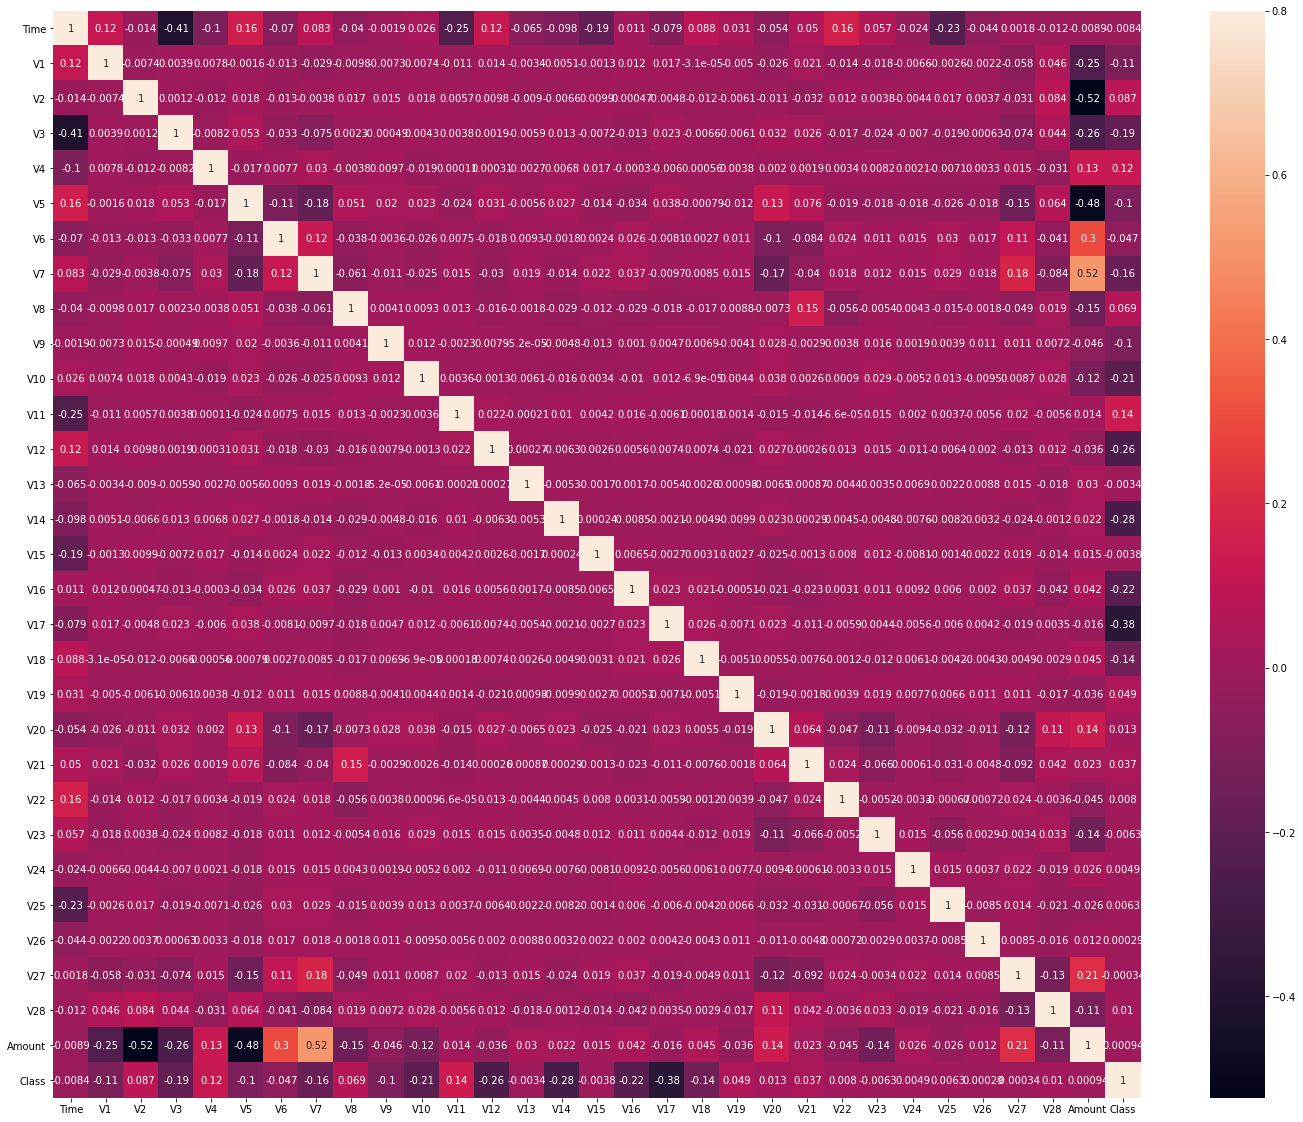

In [28]:
#correlation matrix
comatrix=data.corr()
fig=plt.figure(figsize=(25,20))
sns.heatmap(comatrix,vmax=0.8,square=True,annot=True)
plt.show()

In [29]:
sc = StandardScaler()
amount = data['Amount'].values
data['Amount'] = sc.fit_transform(amount.reshape(-1, 1))
data.shape

(28373, 31)

In [30]:
data.drop(['Time'], axis=1, inplace=True)
data.shape

(28373, 30)

In [31]:
#get all the columns from dataframe
columns=data.columns.tolist()
columns=[c for c in columns if c not in ['Class']]

In [32]:
#storing the variable we will be predicting on.
target='Class'

In [33]:
#Data to be analysed.
x=data[columns]
y=data[target]

In [34]:
#define random state and validation size
state=1
validation_size=0.25

In [35]:
#splitting the data into training and testing data
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=validation_size,random_state=state)

In [36]:
classifiers={
    "Local Outlier Factor": LocalOutlierFactor(n_neighbors=20,contamination=outlier_fraction)
}

In [37]:
#Fit the model
n_outliers=len(Fraud)
for i,(clf_name,clf) in enumerate(classifiers.items()):
    #fitting the data and tag outlier
    clf.fit(x_train,y_train)
    y_pred=clf.fit_predict(x_test)
    scores_pred=clf.negative_outlier_factor_

In [38]:
#Reshape the prediction values to 1 for fraud,0 for valid.
y_pred[y_pred == 1]=0
y_pred[y_pred == -1]=1

In [39]:
n_errors = (y_pred !=y_test).sum()

In [40]:
#run classification matrix
print('{} : {}'.format(clf_name,n_errors))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Local Outlier Factor : 15
0.9978855370735833
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7078
           1       0.55      0.38      0.44        16

    accuracy                           1.00      7094
   macro avg       0.77      0.69      0.72      7094
weighted avg       1.00      1.00      1.00      7094



In [41]:
print('F1 score of the Local Outlier Factor model is {}'.format(f1_score(y_test, y_pred)))

F1 score of the Local Outlier Factor model is 0.4444444444444444
